![](https://mlfjqdsf5ptg.i.optimole.com/iQrIoNc-LQvF_N5U/w:800/h:400/q:69/https://nationaldaycalendar.com/wp-content/uploads/2014/10/Breast-Cancer-Awareness-Month-October-1.jpg)

# Table of Contents

  
- Contents

- First look at the dataset

- EDA

   - Checking for Missing Values
   
   - Basic Statistical Details
  
   - Correlation Heatmap
      
- Data Visualization

    - Histogram 
 
- Pre-Modeling Tasks

   - Separating the independant and the dependant variable
   - Splitting the dataset 
   - Feature Scaling
  
- Modeling

   - Logistic Regression
   - Gradient Boosting Classifier
   - Random Forest Classifier
   - Decision Tree Classifier
   - KNeighbors Classifier
   - XGB Classifier
   - Suport Vector Machine
   
   
- Evaluation and comparision of all the models

  - Classification Accuracy

  - Confusion matrix

  - Precision

  - Recall

  - classification_report

  - ROC AUC Score

  - Area under curve (AUC)
   
 

# Loading the libraries and the dataset

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [171]:
df = pd.read_csv("/home/dsm/notebook/ml_classifiers/Q.1-5_ml/breast-cancer-wisconsin.csv")

# Look at the dataset

Attribute Information:

- 1) ID number

- 2) Diagnosis (M = malignant, B = benign)
  

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

****Check the target variable:****

- Malignant = 1 (indicates prescence of cancer cells)

- Benign = 0 (indicates abscence)

****What is the difference between Malignant and Benign ?****

![Differences Between a Malignant and Benign Tumor](https://gotalktogetherdotcom.files.wordpress.com/2016/05/cancerbenignmalig1.jpg?w=550)


How many Benign and Malignant do we have in our dataset?

In [172]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

In [173]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [174]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [175]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [176]:
df.shape

(569, 33)

# Exploratory Data Analysis

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Basic Statistical Details

In [178]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Checking for missing values

Machine Learning algorithm generally, cannot work with missing values, so before we launch a machine learning algorithm we must cleaning the dataset, we will remove the features that doesn't affect the model 

In [179]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [180]:
# Deleting the id and Unnamed column

df= df.drop(['Unnamed: 32','id'],axis=1)

## Checking for the correlation

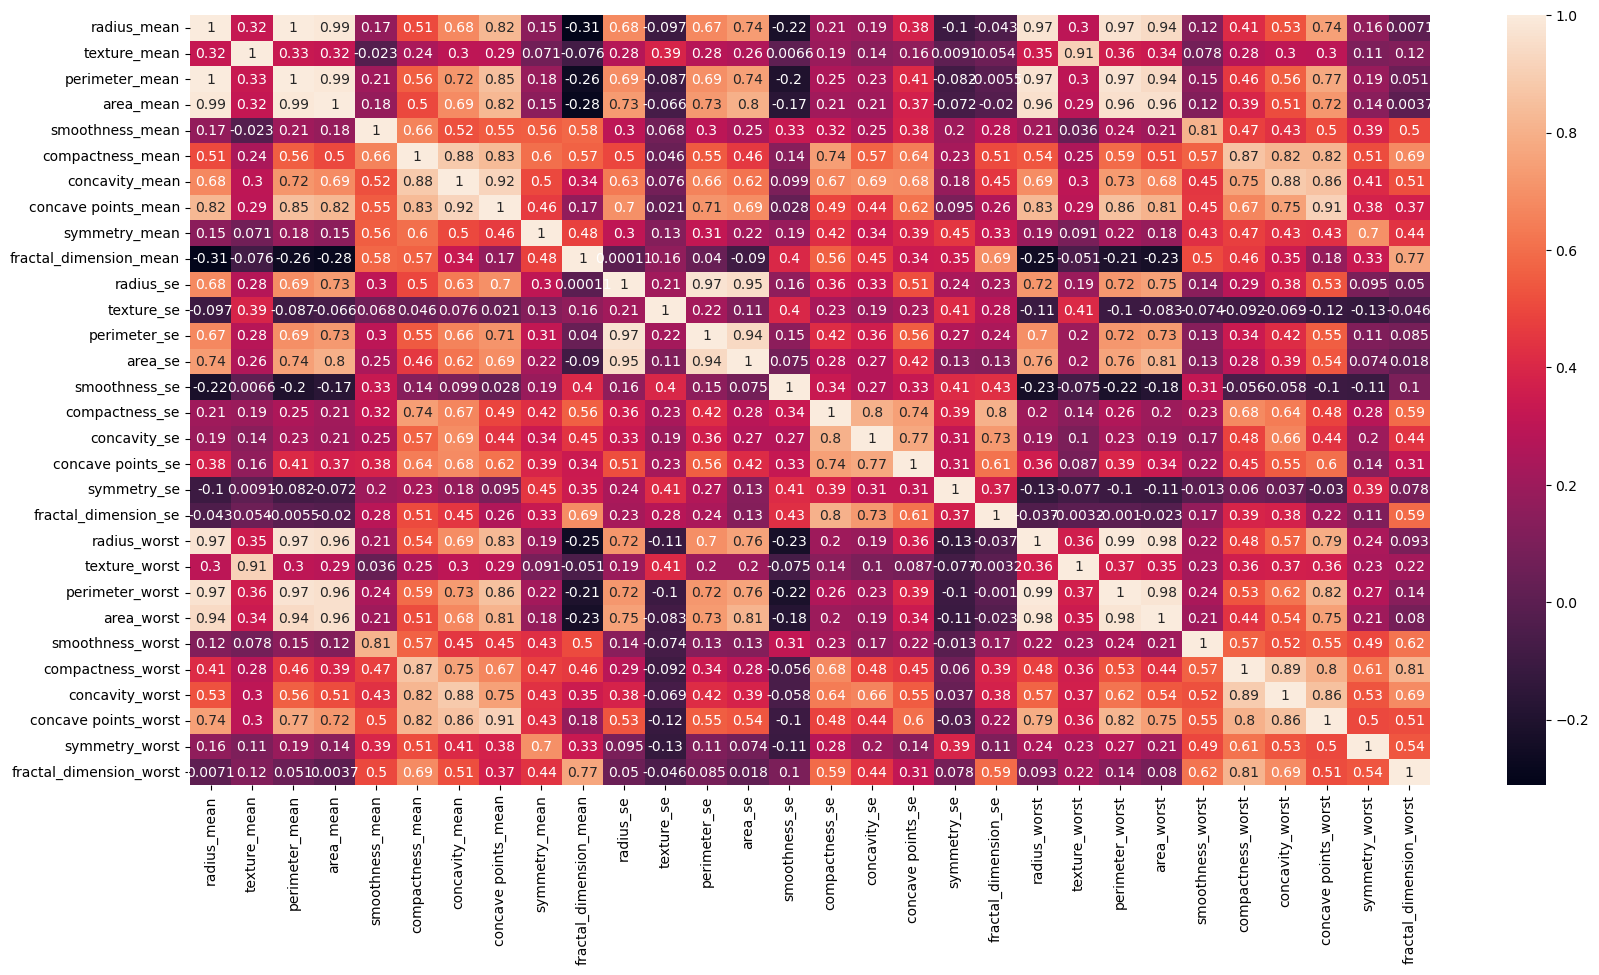

In [181]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

# Data Visualization

## Histogram

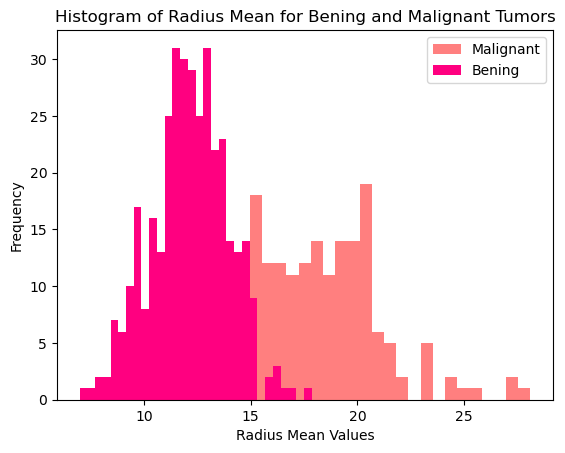

In [182]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

# Encoding categorical data

As we know machine learning algorithms can only read numerical values. It is essential to encoding categorical features into numerical values.

In [183]:
# Label Encoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

So we have encoded malignan as 1 and benign as 0

# Pre-Modeling Tasks

## Separating the independant and the dependant variable

In [184]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

## Splitting the dataset

In Machine learning we must split the dataset into training and testing data:

 - the training set called also learning set that we will use to train our model, it has the big part.

 - the testing set: is used to evaluate the performance of the model after hypermarameter tuning, It's also useful to get an idea of how different models (SVMs, Neural Networks,    Random forests...) perform against each other.

- So creating the test set is easy, we just select a few rondom rows, in general we give it 10%  or 20%.

- SKit_Learn provides a function of splitting the dataset into multiples subsets. 


- train_test_split(), is the simplest way wich the same as the function: split_train_test(), the method accepts lists, numpy arrays, scipy sparse matrices or pandas dataframes.

  We will also identify some parameters, like the random_state that allows you to set the random generator seed.

- The ideal split is said to be 80:20 for training and testing. You may need to adjust it depending on the size of the dataset and parameter complexity.

In [185]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

# Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score.

Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.


There are two ways for scaling the dataset:
 
 -Standardization
 
 -Min_Max Scaling
 
- Standardization : it substract the mean value( so standardized values always have a zero mean), and then it divides by the standard deviation, this method doesn't have a         specific range from 0 to 1, that may cause a problem for many algorithms like Neural Network often expect an input value ranging from 0 to 1. 
 
  Sckit-Learn provides a transformer caller **StandardScaler**. The idea behind **StandardScaler** is that it will transform your data such that its distribution will have a       mean value 0 and standard deviation of 1.
 

- Min_Max : called also Normalization, is the simplest way to scaling data, values are shifted and rescaled again so that the end up ranging from 0 to 1. we do this by             substraction the min value and dividing by the Max minus the Min.

  Sckit-learn provides a transformer callec **MinMaxScaler**.  It have a hyperparameter called "Feature Range" to specify the range that you want.

In [186]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

# Modeling and Optimization 

## Questions 1 to 4

### 1. KNN Classifier and Optimization 

In [187]:
# KNeighbors Classifier

estimators = list(range(3, 10, 2))
abc_scores = []

for i in estimators:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred_knn)
    abc_scores.append(score)

In [188]:
abc_scores

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9649122807017544]

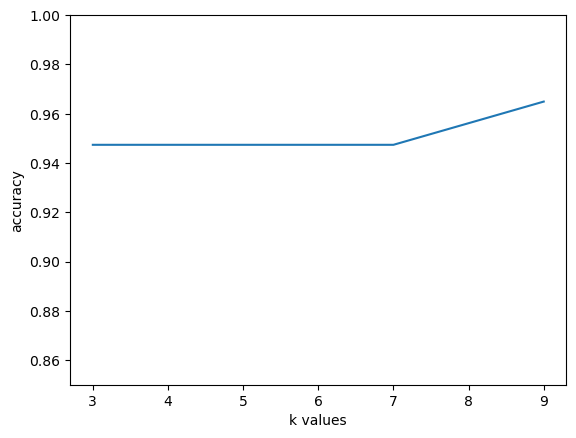

In [189]:
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()



### 2. Decision Tree Classifier and Optimization 

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [191]:
cancer = load_breast_cancer()
digits = load_digits()

data = cancer

In [192]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint32')

In [193]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [194]:
X = df.drop('target', axis=1)
y = df[['target']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [195]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [196]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score


0.9385964912280702

In [197]:
estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    

In [198]:
abc_scores

[0.9473684210526315,
 0.9298245614035088,
 0.9912280701754386,
 0.9736842105263158,
 0.9649122807017544,
 0.956140350877193,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9649122807017544,
 0.9912280701754386,
 0.9736842105263158,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771]

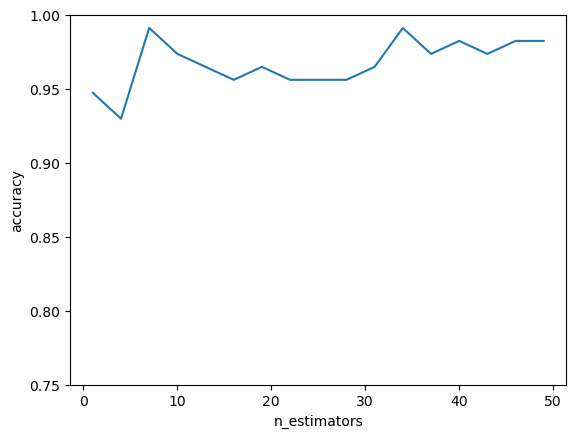

In [199]:
# plot test scores and n_estimators
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.75,1])
plt.show()

### 3. Comparing the Two with other classifers

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [201]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [202]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [203]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [204]:
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

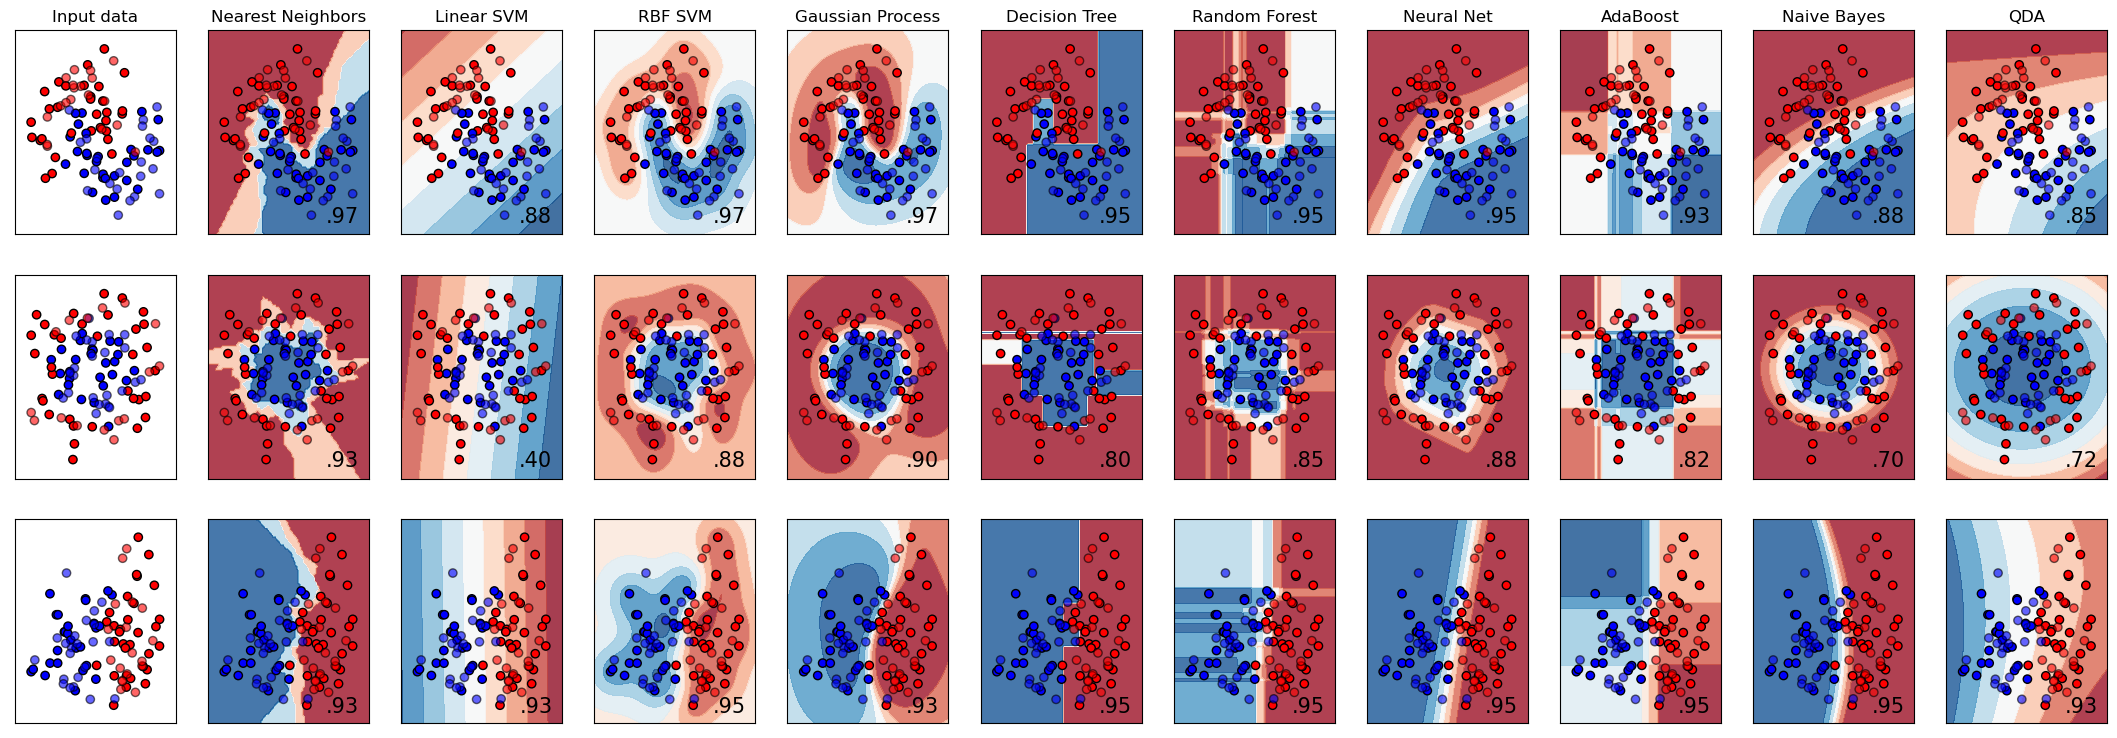

In [205]:

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

Both decision tree and KNN classifiers have well distincted boundaries as compared to other classifiers e.g Linear SVM. Also their input are well seperated and distinguished within their boundaries

### 4. Evaluating and comparing different classifier models

- In this part we'll try differents models of Machine learning: Logistic Regression, Gradient Boosting Classifier,Random Forest,XGB Classifier, Support Vector Machine, Decision  tree and KNeighbors Model. We will also be using confusion matrix, accuracy, recall precision, ROC, AUC, Complexity

In [206]:
# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

In [207]:
# Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

In [208]:
# Gradient Boosting Classifier


GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier

for i in range (3,10,2):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)


# Support Vector classifier

svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


In [209]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60, 2), (60,), (40, 2), (40,))

In [210]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]

X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]


for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))   

In [211]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.95,SVC
1,0.95,DecisionTreeClassifier
2,0.95,LogisticRegression
3,0.95,KNeighborsClassifier
4,0.95,RandomForestClassifier
5,0.95,GradientBoostingClassifier
6,0.95,XGB


As we see, from the above table, that the SVC classifier works best for this dataset

## Evaluating The Performance of the model

Evaluating the machine learning model is a crucial part in any data science project. There are many metrics that helps us to evaluate our model accuracy.

- Classification Accuracy

- Confusion matrix

- Precision

- Recall

- classification_report

- ROC AUC Score

- Area under curve (AUC)

Now, let's see the performance metrics of svc classifier

## Confusion Matrix

- A confusion matrix is a table that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class


In a binary classifier, the "**true**" class is typically labeled with 1 and the "**false**" class is labeled with 0.

  - True Positive: A positive class observation (1) is correctly classified as positive by the model.

  - False Positive: A negative class observation (0) is incorrectly classified as positive.

  - True Negative: A negative class observation is correctly classified as negative.

  - False Negative: A positive class observation is incorrectly classified as negative.

Let’s visualize the confusion matrix, to see how accurate are the results we obtained.

In [212]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,20,2
healthy,0,18


<AxesSubplot:>

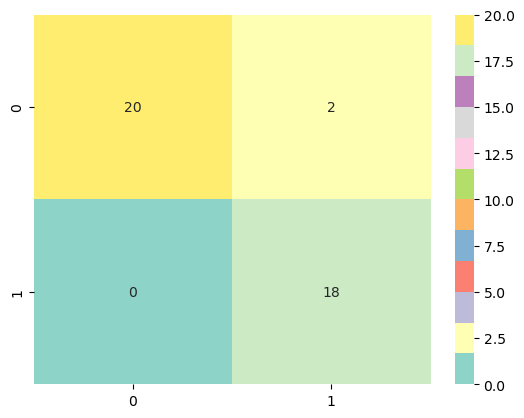

In [213]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')

- As we can see from the table above:

   - **True Positive(TP)** : Values that the model predicted as yes(Healthy), and is actually yes(Healthy).
   - **True Negative(TN)** : Values that the model predicted as not(Cancer), and is actually no(Cancer).
   - **False Positive(FP)**: Values that the model predicted as yes(Healthy), but actually no(Cancer).
   - **False Negative(FN)**: Values that the model predicted as no (Cancer), but actually yes(Healthy).


For this dataset, whenever the model is predicting something as yes, it indicates Absence of cancer cells (Healthy) and for cases when the model predicting no; it indicates existence of cancer cells(Cancer).



## Accuracy_Score

- **Accuracy_Score** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations


(TP + TN)/total = 0.98245614

In [214]:
print(accuracy_score(y_test, y_pred_svc))

0.95


## Precision 

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [215]:
print(precision_score(y_test, y_pred_svc))

1.0


## Recall

- **Recall** also called Sensitivity, is the ratio of positive instances that are correctly detected by the classifier to the all observations in actual class

In [216]:
print(recall_score(y_test, y_pred_svc))

0.9090909090909091


## Classification Report


In [217]:
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.91      0.95        22

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



- True Positive(TP) : 71
    
- True Negative(TN) : 41
    
- False Positive(FP): 2
    
- False Negative(FN): 0


**True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?**

- **True Positive Rate(TPR)** = TP/TP+FP = 71/(871+2) = 0.97


**False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?**

- **False Positive Rate(FPR)** = FP/FP+TN = 2/2+41 = 0.04

## The ROC Curve

In [218]:
#plt.style.use('seaborn-pastel')

y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

0.9797979797979798


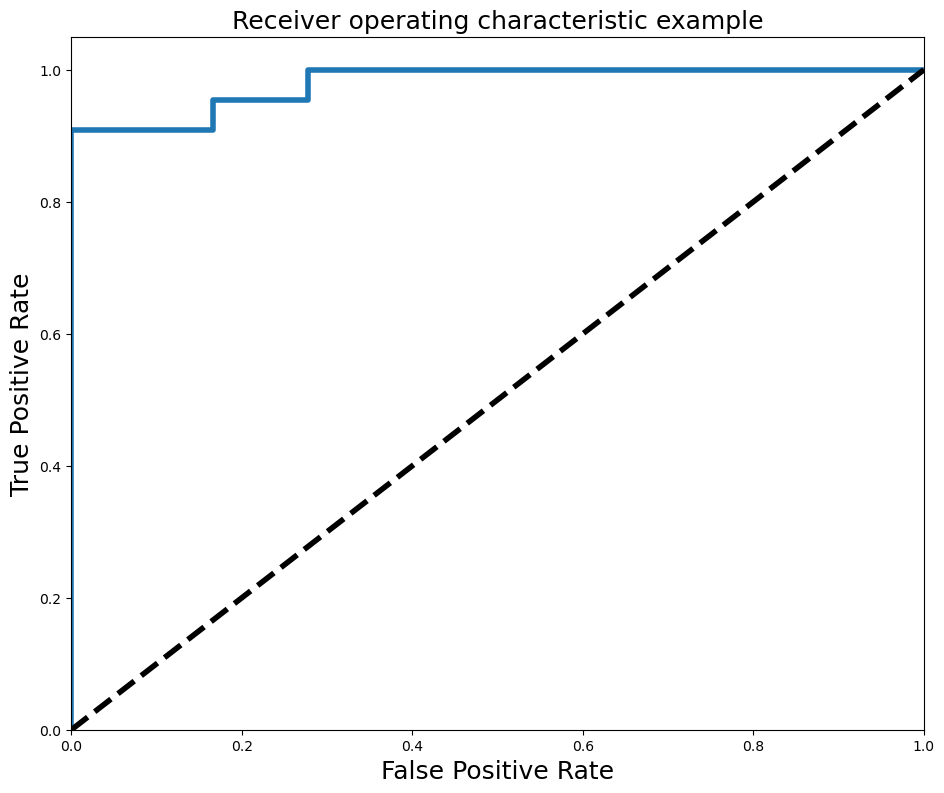

In [219]:
plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example', fontsize= 18)
plt.show()

- The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). As we notice the **svc** Classifier give a curve closer

  to the top-left corner so it indicate a better performance. 

## Area Under Curve

Area Under Curve is a common way to compare classifiers. A perfect classifier will have ROC AUC equal to 1

Sckit-Learn provides a function to compute the ROC AUC.

In [220]:
roc_auc_score(y_test, y_score)

0.9797979797979798

### 5. Describe the algorithm for Random Forest Classifier (both math and algorithm)

### Random Forest Algorithm and maths


Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

### Random Forest Algorithm

##### Note: 

To better understand the Random Forest Algorithm, you should have knowledge of the Decision Tree Algorithm.

##### Assumptions for Random Forest

Since the random forest combines multiple trees to predict the class of the dataset, it is possible that some decision trees may predict the correct output, while others may not. But together, all the trees predict the correct output. Therefore, below are two assumptions for a better Random forest classifier:

There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
The predictions from each tree must have very low correlations.


#### Why use Random Forest?

Below are some points that explain why we should use the Random Forest algorithm:

    It takes less training time as compared to other algorithms.
    It predicts output with high accuracy, even for the large dataset it runs efficiently.
    It can also maintain accuracy when a large proportion of data is missing.

How does Random Forest algorithm work?

Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

### The Working process can be explained in the below steps and diagram:

###### Step-1: Select random K data points from the training set.

##### Step-2: Build the decision trees associated with the selected data points (Subsets).

###### Step-3: Choose the number N for decision trees that you want to build.

###### Step-4: Repeat Step 1 & 2.

###### Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes. 

The working of the algorithm can be better understood by the below example:

##### Example:

Suppose there is a dataset that contains multiple fruit images. So, this dataset is given to the Random forest classifier. The dataset is divided into subsets and given to each decision tree. During the training phase, each decision tree produces a prediction result, and when a new data point occurs, then based on the majority of results, the Random Forest classifier predicts the final decision. Consider the below image:

## Python Implementation of Random Forest Algorithm

Now we will implement the Random Forest Algorithm tree using Python. For this, we will use the same dataset "user_data.csv", which we have used in previous classification models. By using the same dataset, we can compare the Random Forest classifier with other classification models such as Decision tree Classifier,
KNN,
SVM,
Logistic Regression,
    
## Implementation Steps are given below:


   ##### Data Pre-processing step
   ##### Fitting the Random forest algorithm to the Training set
   ##### Predicting the test result
   ##### Test accuracy of the result (Creation of Confusion matrix)
   ##### Visualizing the test set result.


### 1.Data Pre-Processing Step:

Below is the code for the pre-processing step:

    # importing libraries  
    import numpy as nm  
    import matplotlib.pyplot as mtp  
    import pandas as pd  
      
    #importing datasets  
    data_set= pd.read_csv('user_data.csv')  
      
    #Extracting Independent and dependent Variable  
    x= data_set.iloc[:, [2,3]].values  
    y= data_set.iloc[:, 4].values  
      
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
      
    #feature Scaling  
    from sklearn.preprocessing import StandardScaler    
    st_x= StandardScaler()    
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test)    

### 2. Fitting the Random Forest algorithm to the training set:

Now we will fit the Random forest algorithm to the training set. To fit it, we will import the RandomForestClassifier class from the sklearn.ensemble library. The code is given below:

    #Fitting Decision Tree classifier to the training set  
    from sklearn.ensemble import RandomForestClassifier  
    classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
    classifier.fit(x_train, y_train)  

In the above code, the classifier object takes below parameters:

    n_estimators= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.
    criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

### 3. Predicting the Test Set result

Since our model is fitted to the training set, so now we can predict the test result. For prediction, we will create a new prediction vector y_pred. Below is the code for it:

    #Predicting the test set result  
    y_pred= classifier.predict(x_test)  

### 4. Creating the Confusion Matrix

Now we will create the confusion matrix to determine the correct and incorrect predictions. Below is the code for it:

    #Creating the Confusion matrix  
    from sklearn.metrics import confusion_matrix  
    cm= confusion_matrix(y_test, y_pred)  

### 5. Visualizing the training Set result

Here we will visualize the training set result. To visualize the training set result we will plot a graph for the Random forest classifier. The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car as we did in Logistic Regression.
Below is the code for it:

    from matplotlib.colors import ListedColormap  
    x_set, y_set = x_train, y_train  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('purple', 'green'))(i), label = j)  
    mtp.title('Random Forest Algorithm (Training set)')  
    mtp.xlabel('Age')  
    mtp.ylabel('Estimated Salary')  
    mtp.legend()  
    mtp.show()  

### 6. Visualizing the test set result

Now we will visualize the test set result. Below is the code for it:

    #Visulaizing the test set result  
    from matplotlib.colors import ListedColormap  
    x_set, y_set = x_test, y_test  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('purple', 'green'))(i), label = j)  
    mtp.title('Random Forest Algorithm(Test set)')  
    mtp.xlabel('Age')  
    mtp.ylabel('Estimated Salary')  
    mtp.legend()  
    mtp.show()  



In [222]:
# add files to convert to pdf
pip install nbconvert

SyntaxError: invalid syntax (1016690526.py, line 2)